---
## Random Forest: Red Wine Quality

Data set: http://archive.ics.uce.edu/ml/datasets/Wine+Quality



In [1]:
import pandas as pd

#import the dataset
WineQuality_Red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
WineQuality_Red.to_csv('WineQuality_Red.csv')
print(WineQuality_Red.columns)
                              

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


### Select Data Set Metrics and Classifier

In [2]:
#Create variables for metrics and classifier so we can use this on different data sets
my_metrics = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
my_classifier = 'quality'

## Split the data into training and test portions

In [3]:
from sklearn.model_selection import train_test_split


X = WineQuality_Red[my_metrics]
y = WineQuality_Red[my_classifier]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5) #training set size = 1-test_size

In [4]:
#show metrics

X_train.head() #first 5 rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
91,8.6,0.49,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9
785,9.9,0.35,0.41,2.3,0.083,11.0,61.0,0.99820,3.21,0.50,9.5
592,9.0,0.45,0.49,2.6,0.084,21.0,75.0,0.99870,3.35,0.57,9.7
978,7.0,0.40,0.32,3.6,0.061,9.0,29.0,0.99416,3.28,0.49,11.3
118,8.8,0.55,0.04,2.2,0.119,14.0,56.0,0.99620,3.21,0.60,10.9


In [5]:
#show quality scores

y_train.head() #prints out first 5 rows

91     6
785    5
592    5
978    7
118    6
Name: quality, dtype: int64

## Training the Model

In [6]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier ?
clf=RandomForestClassifier(n_estimators=1000)

#Train the model using the training sets
clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

## Evaluate the Model

In [7]:
#Import Scikit-Learn metrics module for accuracy calculation
from sklearn import metrics

#Model Accuracy -- how often is the classifier correct?
print("Accuracy:",str(round(metrics.accuracy_score(y_test, y_pred)*100,2))+'%')

Accuracy: 67.38%


### Test the Model With An Example

In [31]:
#let's create a sample wine and analyze it's values
#The quality score for this wine was a 5/10
sample_wine = {'fixed acidity':6.2, 
               'volatile acidity':0.64, 
               'citric acid':0.09, 
               'residual sugar':2.5,
               'chlorides':0.081, 
               'free sulfur dioxide':15.0, 
               'total sulfur dioxide':26.0, 
               'density':0.99538,
               'pH':3.57, 
               'sulphates':0.63, 
               'alcohol':12.0}

#Run the values through our model
sample_wine_df = pd.DataFrame.from_dict([sample_wine])
predicted_score = clf.predict(sample_wine_df)[0]

#print the predicted score
print('Expected:',5)
print('Predicted:',predicted_score)


Expected: 5
Predicted: 6


### What Drives the Model's Decision Making Abilities?

In [9]:
#Feature importance with Pandas
#Order by importance
feature_imp = pd.Series(clf.feature_importances_, index=my_metrics).sort_values(ascending=True)

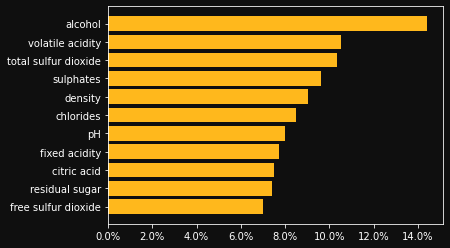

In [10]:
#Plot the data
from matplotlib import pyplot as plt, ticker as mtick

#format the graph
plt.style.use('dark_background')
fig, ax = plt.subplots()
fig.patch.set_facecolor('#0f0f0f')
ax.patch.set_facecolor('#0f0f0f')
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))

#plot the data
ax.barh(feature_imp.index, feature_imp.values, color='#ffb81c')
plt.show()
